Coding ini dikerjakan dengan bantuan ChatGPT

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

df = pd.read_csv('/content/dataset.csv')
df

,No,NRP,Nama,harga rumah,jumlah kamar tidur,jumlah kamar mandi,luas tanah (m2),luas bangunan (m2),carport (mobil),pasokan listrik (watt),Kabupaten/Kota,kecamatan,kelurahan,keamanan (ada/tidak),taman (ada/tidak),jarak dengan rumah sakit terdekat (km),jarak dengan sekolah terdekat (km),jarak dengan tol terdekat (km),Link Data Rumah
0,1,2172015,Dave,"Rp 540,000,000.00",2,2,25,45,0,22000,Jakarta Pusat,Kemayoran,Kebon Kosong,ada,tidak,2.7,1.7,4.1,https://www.rumah123.com/properti/jakarta-pusa...
1,2,2172015,Dave,"Rp 4,870,000,000.00",1,1,336,366,2,450,Jakarta Pusat,Cempaka Putih,Cempaka Putih Timur,tidak,ada,4.6,1.7,6.0,https://www.rumah123.com/properti/jakarta-pusa...
2,3,2172015,Dave,"Rp 15,900,000,000.00",1,1,433,433,1,900,Jakarta Pusat,Gambir,Petojo Selatan,ada,ada,6.1,5.5,8.8,https://www.rumah123.com/properti/jakarta-pusa...
3,4,2172015,Dave,"Rp 90,000,000,000.00",6,6,1225,800,10,33000,Jakarta Pusat,Menteng,Cikini,tidak,ada,4.6,1.5,9.9,https://www.rumah123.com/properti/jakarta-pusa...
4,5,2172015,Dave,"Rp 2,100,000,000.00",2,2,72,110,1,2200,Jakarta Pusat,Cideng,Cideng Raya,tidak,tidak,0.1,0.2,7.8,https://www.rumah123.com/properti/jakarta-pusa...
5,6,2172015,Dave,"Rp 12,500,000,000.00",1,1,601,300,0,2200,Jakarta Pusat,Cempaka Putih,Cempaka Putih Timur,tidak,tidak,0.7,0.3,3.0,https://www.rumah123.com/properti/jakarta-pusa...
6,7,2172015,Dave,"Rp 3,800,000,000.00",3,3,140,117,2,3500,Jakarta Pusat,Tanah Abang,Bendungan Hilir,tidak,ada,0.5,2.3,5.2,https://www.rumah123.com/properti/jakarta-pusa...
7,8,2172015,Dave,"Rp 470,000,000.00",2,1,23,57,0,1300,Jakarta Pusat,Cempaka Putih,Cempaka Putih Barat,ada,tidak,2.3,0.3,3.2,https://www.rumah123.com/properti/jakarta-pusa...
8,9,2172015,Dave,"Rp 3,750,000,000.00",4,5,136,260,1,10000,Jakarta Pusat,Senen,Bungur,tidak,ada,3.6,6.2,4.8,https://www.rumah123.com/properti/jakarta-pusa...
9,10,2172015,Dave,"Rp 8,000,000,000.00",4,3,180,500,2,16500,Jakarta Pusat,Kemayoran,Springhill Residence,ada,ada,4.6,8.7,4.5,https://www.rumah123.com/properti/jakarta-pusa...


In [3]:
df['harga rumah'] = df['harga rumah'].str.replace('Rp', '').str.replace(',', '').str.replace(' ', '').str.replace('.', '')
df['harga rumah'] = df['harga rumah'].astype('int64')

#df['jarak dengan rumah sakit terdekat (km)'] = df['jarak dengan rumah sakit terdekat (km)'].str.replace(',', '.')
df['jarak dengan rumah sakit terdekat (km)'] = df['jarak dengan rumah sakit terdekat (km)'].astype('float')

#df['jarak dengan sekolah terdekat (km)'] = df['jarak dengan sekolah terdekat (km)'].str.replace(',', '.')
df['jarak dengan sekolah terdekat (km)'] = df['jarak dengan sekolah terdekat (km)'].astype('float')

#df['jarak dengan tol terdekat (km)'] = df['jarak dengan tol terdekat (km)'].str.replace(',', '.')
df['jarak dengan tol terdekat (km)'] = df['jarak dengan tol terdekat (km)'].astype('float')

df

,No,NRP,Nama,harga rumah,jumlah kamar tidur,jumlah kamar mandi,luas tanah (m2),luas bangunan (m2),carport (mobil),pasokan listrik (watt),Kabupaten/Kota,kecamatan,kelurahan,keamanan (ada/tidak),taman (ada/tidak),jarak dengan rumah sakit terdekat (km),jarak dengan sekolah terdekat (km),jarak dengan tol terdekat (km),Link Data Rumah
0,1,2172015,Dave,54000000000,2,2,25,45,0,22000,Jakarta Pusat,Kemayoran,Kebon Kosong,ada,tidak,2.7,1.7,4.1,https://www.rumah123.com/properti/jakarta-pusa...
1,2,2172015,Dave,487000000000,1,1,336,366,2,450,Jakarta Pusat,Cempaka Putih,Cempaka Putih Timur,tidak,ada,4.6,1.7,6.0,https://www.rumah123.com/properti/jakarta-pusa...
2,3,2172015,Dave,1590000000000,1,1,433,433,1,900,Jakarta Pusat,Gambir,Petojo Selatan,ada,ada,6.1,5.5,8.8,https://www.rumah123.com/properti/jakarta-pusa...
3,4,2172015,Dave,9000000000000,6,6,1225,800,10,33000,Jakarta Pusat,Menteng,Cikini,tidak,ada,4.6,1.5,9.9,https://www.rumah123.com/properti/jakarta-pusa...
4,5,2172015,Dave,210000000000,2,2,72,110,1,2200,Jakarta Pusat,Cideng,Cideng Raya,tidak,tidak,0.1,0.2,7.8,https://www.rumah123.com/properti/jakarta-pusa...
5,6,2172015,Dave,1250000000000,1,1,601,300,0,2200,Jakarta Pusat,Cempaka Putih,Cempaka Putih Timur,tidak,tidak,0.7,0.3,3.0,https://www.rumah123.com/properti/jakarta-pusa...
6,7,2172015,Dave,380000000000,3,3,140,117,2,3500,Jakarta Pusat,Tanah Abang,Bendungan Hilir,tidak,ada,0.5,2.3,5.2,https://www.rumah123.com/properti/jakarta-pusa...
7,8,2172015,Dave,47000000000,2,1,23,57,0,1300,Jakarta Pusat,Cempaka Putih,Cempaka Putih Barat,ada,tidak,2.3,0.3,3.2,https://www.rumah123.com/properti/jakarta-pusa...
8,9,2172015,Dave,375000000000,4,5,136,260,1,10000,Jakarta Pusat,Senen,Bungur,tidak,ada,3.6,6.2,4.8,https://www.rumah123.com/properti/jakarta-pusa...
9,10,2172015,Dave,800000000000,4,3,180,500,2,16500,Jakarta Pusat,Kemayoran,Springhill Residence,ada,ada,4.6,8.7,4.5,https://www.rumah123.com/properti/jakarta-pusa...


In [4]:
delete = ['No','NRP','Nama','Link Data Rumah']
df = df.drop(delete, axis=1)
df = df.dropna()

df

,harga rumah,jumlah kamar tidur,jumlah kamar mandi,luas tanah (m2),luas bangunan (m2),carport (mobil),pasokan listrik (watt),Kabupaten/Kota,kecamatan,kelurahan,keamanan (ada/tidak),taman (ada/tidak),jarak dengan rumah sakit terdekat (km),jarak dengan sekolah terdekat (km),jarak dengan tol terdekat (km)
0,54000000000,2,2,25,45,0,22000,Jakarta Pusat,Kemayoran,Kebon Kosong,ada,tidak,2.7,1.7,4.1
1,487000000000,1,1,336,366,2,450,Jakarta Pusat,Cempaka Putih,Cempaka Putih Timur,tidak,ada,4.6,1.7,6.0
2,1590000000000,1,1,433,433,1,900,Jakarta Pusat,Gambir,Petojo Selatan,ada,ada,6.1,5.5,8.8
3,9000000000000,6,6,1225,800,10,33000,Jakarta Pusat,Menteng,Cikini,tidak,ada,4.6,1.5,9.9
4,210000000000,2,2,72,110,1,2200,Jakarta Pusat,Cideng,Cideng Raya,tidak,tidak,0.1,0.2,7.8
5,1250000000000,1,1,601,300,0,2200,Jakarta Pusat,Cempaka Putih,Cempaka Putih Timur,tidak,tidak,0.7,0.3,3.0
6,380000000000,3,3,140,117,2,3500,Jakarta Pusat,Tanah Abang,Bendungan Hilir,tidak,ada,0.5,2.3,5.2
7,47000000000,2,1,23,57,0,1300,Jakarta Pusat,Cempaka Putih,Cempaka Putih Barat,ada,tidak,2.3,0.3,3.2
8,375000000000,4,5,136,260,1,10000,Jakarta Pusat,Senen,Bungur,tidak,ada,3.6,6.2,4.8
9,800000000000,4,3,180,500,2,16500,Jakarta Pusat,Kemayoran,Springhill Residence,ada,ada,4.6,8.7,4.5


In [5]:
categorical_columns = ['Kabupaten/Kota', 'kecamatan', 'kelurahan', 'keamanan (ada/tidak)', 'taman (ada/tidak)']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df

## OR USE THIS ##
#from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
#categorical = ['Kabupaten/Kota', 'kecamatan', 'kelurahan', 'keamanan (ada/tidak)', 'taman (ada/tidak)']
#df = pd.get_dummies(df, columns=categorical)
#df

,harga rumah,jumlah kamar tidur,jumlah kamar mandi,luas tanah (m2),luas bangunan (m2),carport (mobil),pasokan listrik (watt),Kabupaten/Kota,kecamatan,kelurahan,keamanan (ada/tidak),taman (ada/tidak),jarak dengan rumah sakit terdekat (km),jarak dengan sekolah terdekat (km),jarak dengan tol terdekat (km)
0,54000000000,2,2,25,45,0,22000,0,4,15,0,1,2.7,1.7,4.1
1,487000000000,1,1,336,366,2,450,0,0,4,1,0,4.6,1.7,6.0
2,1590000000000,1,1,433,433,1,900,0,2,20,0,0,6.1,5.5,8.8
3,9000000000000,6,6,1225,800,10,33000,0,5,6,1,0,4.6,1.5,9.9
4,210000000000,2,2,72,110,1,2200,0,1,5,1,1,0.1,0.2,7.8
5,1250000000000,1,1,601,300,0,2200,0,0,4,1,1,0.7,0.3,3.0
6,380000000000,3,3,140,117,2,3500,0,8,0,1,0,0.5,2.3,5.2
7,47000000000,2,1,23,57,0,1300,0,0,2,0,1,2.3,0.3,3.2
8,375000000000,4,5,136,260,1,10000,0,7,1,1,0,3.6,6.2,4.8
9,800000000000,4,3,180,500,2,16500,0,4,25,0,0,4.6,8.7,4.5


In [6]:
X = df.drop(columns='harga rumah')
y = df['harga rumah']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test)

In [11]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
print(f'Accuracy: {accuracy}')

Mean Absolute Error (MAE): 1155520248708.566
Mean Squared Error (MSE): 1.8069321692067499e+24
Root Mean Squared Error (RMSE): 1344221770842.4268
R-squared (R2): 0.5274042477525849
Accuracy: 0.5274042477525849


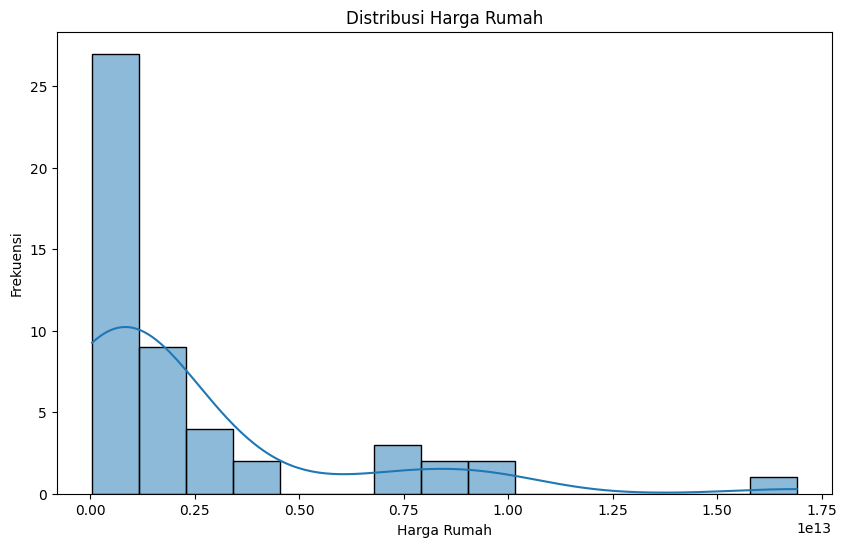

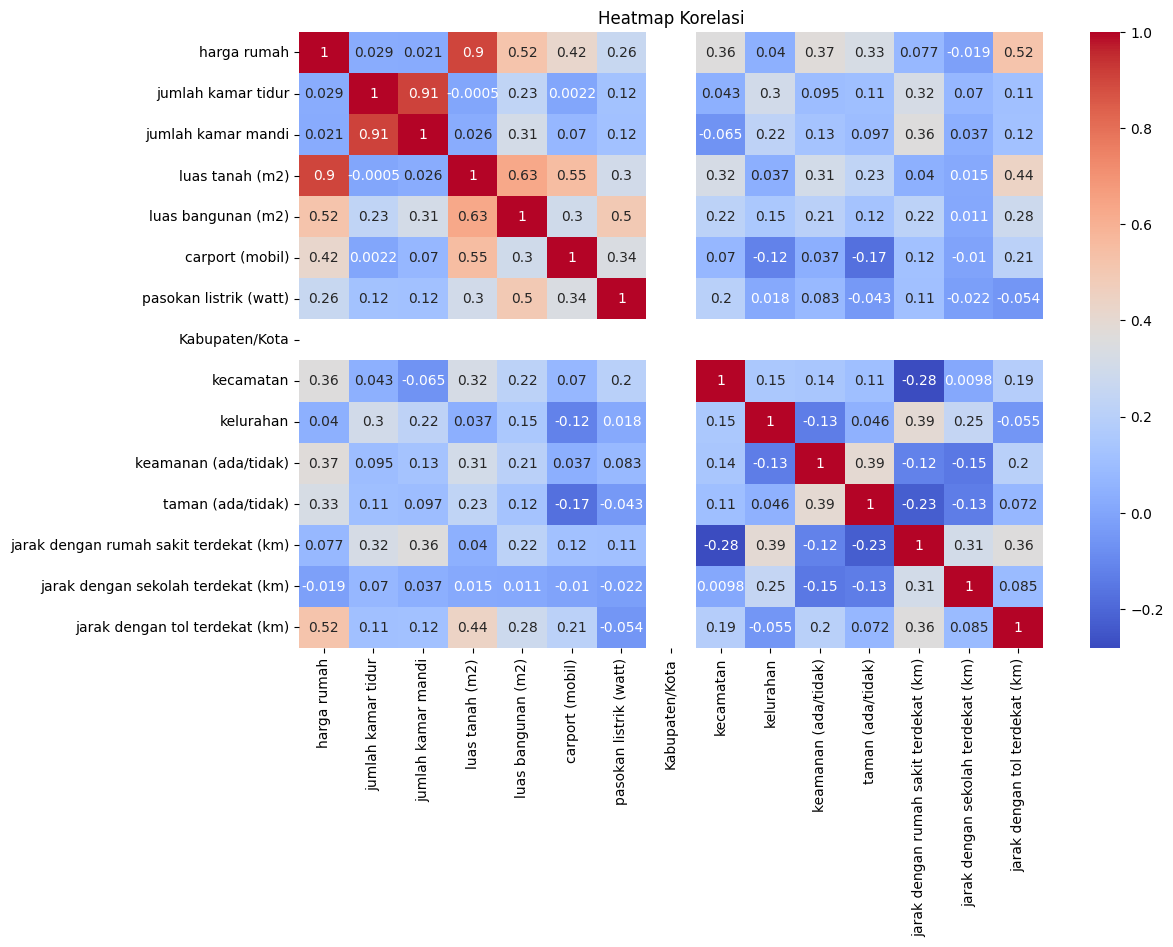

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi harga rumah
plt.figure(figsize=(10, 6))
sns.histplot(df['harga rumah'], kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga Rumah')
plt.ylabel('Frekuensi')
plt.show()

# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

Standard_Scaler = StandardScaler()
X = Standard_Scaler.fit_transform(X)
X

array([[-7.79605491e-01, -5.01227520e-01, -9.94249940e-01,
        -1.23772939e+00, -7.84837296e-01,  1.47837702e+00,
         0.00000000e+00,  7.43294146e-02,  3.50281610e-01,
        -1.12815215e+00,  1.22474487e+00, -2.74553881e-01,
        -4.29987786e-01, -9.43064536e-01],
       [-1.06413304e+00, -7.82816015e-01, -2.01927562e-01,
        -2.54091210e-01,  3.05214504e-01, -7.99382670e-01,
         0.00000000e+00, -1.41225888e+00, -1.08744142e+00,
         8.86405260e-01, -8.16496581e-01,  1.00400586e+00,
        -4.29987786e-01, -1.48112176e-01],
       [-1.06413304e+00, -7.82816015e-01,  4.51954951e-02,
        -4.87835511e-02, -2.39811396e-01, -7.51819243e-01,
         0.00000000e+00, -6.68964732e-01,  1.00379208e+00,
        -1.12815215e+00, -8.16496581e-01,  2.01339513e+00,
         1.31196700e+00,  1.02339656e+00],
       [ 3.58504715e-01,  6.25126458e-01,  2.06294252e+00,
         1.07581213e+00,  4.66542171e+00,  2.64103858e+00,
         0.00000000e+00,  4.45976488e-01, -8.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Pemisahan Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluasi model
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Mean Absolute Error (MAE) dengan Random Forest: {mae_rf}')


Mean Absolute Error (MAE) dengan Random Forest: 1209267500000.0


In [15]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
mae_cv = -cv_scores.mean()

print(f'Mean Absolute Error (MAE) dengan Cross-Validation: {mae_cv}')


Mean Absolute Error (MAE) dengan Cross-Validation: 1010072600000.0


In [16]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

In [17]:
best_rf_model = grid_search.best_estimator_

In [18]:
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
mae_cv = -cv_scores.mean()

In [19]:
y_pred = best_rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE) pada Data Uji: {mae}')
print(f'Mean Squared Error (MSE) pada Data Uji: {mse}')
print(f'Root Mean Squared Error (RMSE) pada Data Uji: {rmse}')
print(f'R-squared (R2) pada Data Uji: {r2}')
print(f'Mean Absolute Error (MAE) dengan Cross-Validation: {mae_cv}')

Mean Absolute Error (MAE) pada Data Uji: 1136546391279.809
Mean Squared Error (MSE) pada Data Uji: 4.3631120612978187e+24
Root Mean Squared Error (RMSE) pada Data Uji: 2088806372380.604
R-squared (R2) pada Data Uji: -0.14115419598403256
Mean Absolute Error (MAE) dengan Cross-Validation: 903421732753.4421


In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Hyperparameter Tuning dengan Grid Search
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search_gb.fit(X_train, y_train)

# Model terbaik dari Grid Search
best_gb_model = grid_search_gb.best_estimator_

# Evaluasi Model dengan Cross-Validation
cv_scores_gb = cross_val_score(best_gb_model, X, y, cv=5, scoring='neg_mean_absolute_error')
mae_cv_gb = -cv_scores_gb.mean()

# Evaluasi Model pada Data Uji
y_pred_gb = best_gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Mean Absolute Error (MAE) pada Data Uji dengan Gradient Boosting: {mae_gb}')
print(f'Mean Squared Error (MSE) pada Data Uji dengan Gradient Boosting: {mse_gb}')
print(f'Root Mean Squared Error (RMSE) pada Data Uji dengan Gradient Boosting: {rmse_gb}')
print(f'R-squared (R2) pada Data Uji dengan Gradient Boosting: {r2_gb}')
print(f'Mean Absolute Error (MAE) dengan Cross-Validation pada Gradient Boosting: {mae_cv_gb}')


Mean Absolute Error (MAE) pada Data Uji dengan Gradient Boosting: 1927303787514.8542
Mean Squared Error (MSE) pada Data Uji dengan Gradient Boosting: 1.3502905179343508e+25
Root Mean Squared Error (RMSE) pada Data Uji dengan Gradient Boosting: 3674629937741.1475
R-squared (R2) pada Data Uji dengan Gradient Boosting: -2.531629874938155
Mean Absolute Error (MAE) dengan Cross-Validation pada Gradient Boosting: 1215978501414.586


In [21]:
import xgboost as xgb

# XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Hyperparameter Tuning dengan Grid Search
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search_xgb.fit(X_train, y_train)

# Model terbaik dari Grid Search
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluasi Model dengan Cross-Validation
cv_scores_xgb = cross_val_score(best_xgb_model, X, y, cv=5, scoring='neg_mean_absolute_error')
mae_cv_xgb = -cv_scores_xgb.mean()

# Evaluasi Model pada Data Uji
y_pred_xgb = best_xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Mean Absolute Error (MAE) pada Data Uji dengan XGBoost: {mae_xgb}')
print(f'Mean Squared Error (MSE) pada Data Uji dengan XGBoost: {mse_xgb}')
print(f'Root Mean Squared Error (RMSE) pada Data Uji dengan XGBoost: {rmse_xgb}')
print(f'R-squared (R2) pada Data Uji dengan XGBoost: {r2_xgb}')
print(f'Mean Absolute Error (MAE) dengan Cross-Validation pada XGBoost: {mae_cv_xgb}')


Mean Absolute Error (MAE) pada Data Uji dengan XGBoost: 776725535180.8
Mean Squared Error (MSE) pada Data Uji dengan XGBoost: 2.3248965533949152e+24
Root Mean Squared Error (RMSE) pada Data Uji dengan XGBoost: 1524761146342.2444
R-squared (R2) pada Data Uji dengan XGBoost: 0.391932771869659
Mean Absolute Error (MAE) dengan Cross-Validation pada XGBoost: 1071886278988.8
